<a href="https://colab.research.google.com/github/codester2228/cfsol/blob/master/Solution_Gaurav_Verma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
    ############Question 3##########
    # load libraries
    import pandas as pd
    import numpy as np
    from sklearn.datasets import load_iris
    import seaborn as sns
    import matplotlib.pyplot as plt

    iris = load_iris()

    # Create features and target
    X = iris.data
    y = iris.target

    # Convert feature matrix into DataFrame
    df = pd.DataFrame(X)
    df.shape




(150, 4)

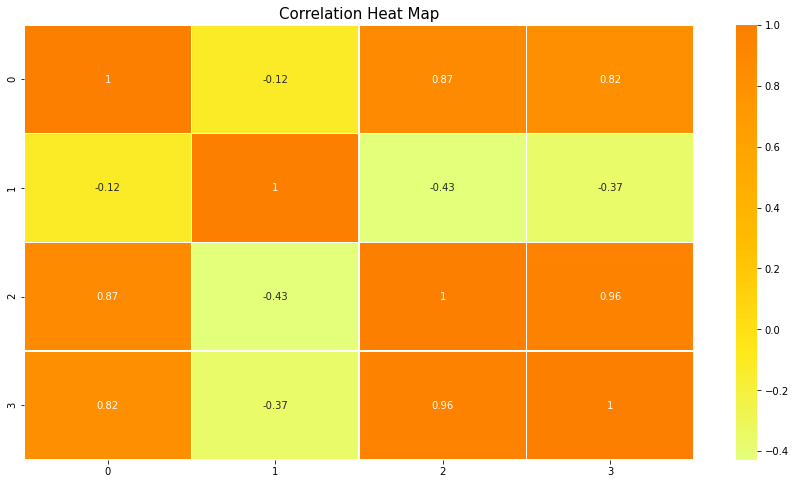

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(),annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15) #shows how much one parameter depends on the another(-1 to 1)
plt.show()

In [36]:
corr_matrix=df.corr().abs()  #original corr matrix, method is pearson by default
mask =np.triu(np.ones_like(corr_matrix,dtype=bool))  #mask to remove upper half of the diagonal since symmetric along diagonal and we want to remove one column for one corr. value
corr_masked=corr_matrix.mask(mask)        #apply mask on matrix

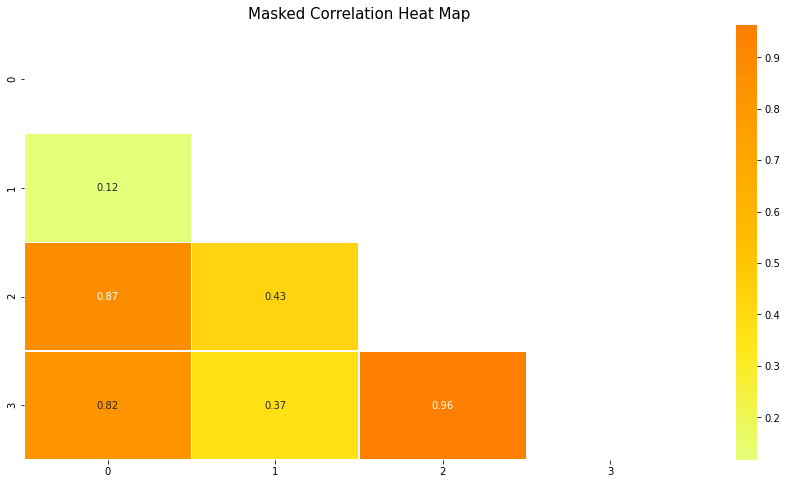

In [37]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(corr_masked,annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Masked Correlation Heat Map', fontsize = 15) #masked heatmap of corr matrix
plt.show()

In [38]:
to_drop = [column for column in corr_masked.columns if any(corr_masked[column] > 0.85)] #selects column which have corr value >0.85
print(to_drop)

[0, 2]


In [39]:
# Drop Marked Features
newdf1 = df.drop(df.columns[to_drop], axis=1)
print(newdf1)

       1    3
0    3.5  0.2
1    3.0  0.2
2    3.2  0.2
3    3.1  0.2
4    3.6  0.2
..   ...  ...
145  3.0  2.3
146  2.5  1.9
147  3.0  2.0
148  3.4  2.3
149  3.0  1.8

[150 rows x 2 columns]


In [44]:
def drop_corr(df):    #required function for dropping corr columns
  corr_matrix=df.corr().abs()  #original corr matrix, method is pearson by default
  mask =np.triu(np.ones_like(corr_matrix,dtype=bool))  #mask to remove upper half of the diagonal since symmetric along diagonal and we want to remove one column for one corr. value
  corr_masked=corr_matrix.mask(mask)        #apply mask on matrix
  to_drop = [column for column in corr_masked.columns if any(corr_masked[column] > 0.85)] #selects column which have corr value >0.85
  newdf2 = df.drop(df.columns[to_drop], axis=1)
  print(newdf2)


In [46]:
print(df) #before

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [45]:
drop_corr(df) #after

       1    3
0    3.5  0.2
1    3.0  0.2
2    3.2  0.2
3    3.1  0.2
4    3.6  0.2
..   ...  ...
145  3.0  2.3
146  2.5  1.9
147  3.0  2.0
148  3.4  2.3
149  3.0  1.8

[150 rows x 2 columns]


In [82]:
#########################end of Q3######################################
#Question 1

In [47]:
from dateutil.relativedelta import *
from dateutil.parser import *
import datetime  #import required datetime libraries

In [48]:
d1=parse("12 sept 19")   #testing parsing
d2=parse("september 2020 13")
print(d1)
print(d2)

2019-09-12 00:00:00
2020-09-13 00:00:00


In [49]:
print(relativedelta(d2,d1)) #testing difference of dates

relativedelta(years=+1, days=+1)


In [50]:
#importing dummy csv from pc 
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Q1 - Copy - Copy.csv to Q1 - Copy - Copy.csv
User uploaded file "Q1 - Copy - Copy.csv" with length 360 bytes


In [51]:
dfq1=pd.read_csv("Q1 - Copy - Copy.csv")

In [53]:
dfq1.head(10) #random dates in string format

,date1,age,date2,date3,name
0,12-Sep-19,20,NaN,31.03.20,dsv
1,28-08-2020,20,12-Sep-19,22 2020 feb,vdsv
2,31.03.20,20,28 12 09,2020 31 jan,v
3,24-Jan-20,20,12 12 31,31.03.20,dvd
4,2020 31 jan,20,31.03.20,12-Sep-19,sdv
5,22 2020 feb,20,2020 31 jan,22 2020 feb,xc
6,12 12 31,20,22 2020 feb,12-Sep-19,sdv
7,12-Sep-19,20,28-08-2020,2020 31 jan,ee
8,12 12 31,20,12 12 31,NaN,sc


In [54]:
dfq1["date2"][0]==dfq1["date2"][0] # to check if not NaN

False

In [55]:
#Required Function datetime
dates=[]
def datetime(dfq1):
  for column in dfq1:   #iterating each column
    i=0
    while(dfq1[column][i]!=dfq1[column][i]):    #checking first value is NaN or not
      i+=1                                  #if yes,then move to next value
    if(isinstance(dfq1[column][i],str)):      #if data is a string,it may be a datetime format
      try:                                  #using try to check if string can be parsed or not,if it can be parsed to date,parse and store
            if(parse(dfq1[column][i])):
              dates.append(column)                             #creating list of date columns
              for i in range(dfq1[column].shape[0]):  
                        if(dfq1[column][i]==dfq1[column][i]):                #parse only in not a NaN value
                                dfq1[column][i]=parse(dfq1[column][i])
      except:                                                            #if data throws an error while parsing,it may be a string like name etc, so pass
        pass

In [56]:
datetime(dfq1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
dfq1.head(10)

,date1,age,date2,date3,name
0,2019-09-12 00:00:00,20,NaN,2020-03-31 00:00:00,dsv
1,2020-08-28 00:00:00,20,2019-09-12 00:00:00,2020-02-22 00:00:00,vdsv
2,2020-03-31 00:00:00,20,2009-12-28 00:00:00,2020-01-31 00:00:00,v
3,2020-01-24 00:00:00,20,2031-12-12 00:00:00,2020-03-31 00:00:00,dvd
4,2020-01-31 00:00:00,20,2020-03-31 00:00:00,2019-09-12 00:00:00,sdv
5,2020-02-22 00:00:00,20,2020-01-31 00:00:00,2020-02-22 00:00:00,xc
6,2031-12-12 00:00:00,20,2020-02-22 00:00:00,2019-09-12 00:00:00,sdv
7,2019-09-12 00:00:00,20,2020-08-28 00:00:00,2020-01-31 00:00:00,ee
8,2031-12-12 00:00:00,20,2031-12-12 00:00:00,NaN,sc


In [58]:
"So, all the random inputs of date have been parsed to proper date time format."

'So, all the random inputs of date have been parsed to proper date time format.'

In [60]:


"since we have no info about the missing dates in this dummy dataset, we should drop these columns.But , in a dataset with more info we can find out a certain date which can be relevant to  other informations."



'since we have no info about the missing dates in this dummy dataset, we should drop these columns.But , in a dataset with more info we can find out a certain date which can be relevant to  other informations.'

In [61]:
dfq1=dfq1.dropna(axis=0) #deleted row where date was missing

In [62]:
dfq1.head(10)

,date1,age,date2,date3,name
1,2020-08-28 00:00:00,20,2019-09-12 00:00:00,2020-02-22 00:00:00,vdsv
2,2020-03-31 00:00:00,20,2009-12-28 00:00:00,2020-01-31 00:00:00,v
3,2020-01-24 00:00:00,20,2031-12-12 00:00:00,2020-03-31 00:00:00,dvd
4,2020-01-31 00:00:00,20,2020-03-31 00:00:00,2019-09-12 00:00:00,sdv
5,2020-02-22 00:00:00,20,2020-01-31 00:00:00,2020-02-22 00:00:00,xc
6,2031-12-12 00:00:00,20,2020-02-22 00:00:00,2019-09-12 00:00:00,sdv
7,2019-09-12 00:00:00,20,2020-08-28 00:00:00,2020-01-31 00:00:00,ee


In [63]:
print(dates)  #list containing name of date columns
len(dates)

['date1', 'date2', 'date3']


3

In [65]:
dfq1.reset_index(drop=True,inplace=True)  #resetting index to 0

In [66]:
dfq1.head(10)

,date1,age,date2,date3,name
0,2020-08-28 00:00:00,20,2019-09-12 00:00:00,2020-02-22 00:00:00,vdsv
1,2020-03-31 00:00:00,20,2009-12-28 00:00:00,2020-01-31 00:00:00,v
2,2020-01-24 00:00:00,20,2031-12-12 00:00:00,2020-03-31 00:00:00,dvd
3,2020-01-31 00:00:00,20,2020-03-31 00:00:00,2019-09-12 00:00:00,sdv
4,2020-02-22 00:00:00,20,2020-01-31 00:00:00,2020-02-22 00:00:00,xc
5,2031-12-12 00:00:00,20,2020-02-22 00:00:00,2019-09-12 00:00:00,sdv
6,2019-09-12 00:00:00,20,2020-08-28 00:00:00,2020-01-31 00:00:00,ee


In [69]:
for i in range(len(dates)):         #creating new columns and subtracting each date columns with others one by one
  for j in range(i+1,len(dates)):
    name="diff"+str(i+1)+"-"+str(j+1)              #naming columns
    dfq1[name]=abs(dfq1[str(dates[i])]-dfq1[str(dates[j])])

In [70]:
dfq1.head(10)

,date1,age,date2,date3,name,diff1-2,diff1-3,diff2-3
0,2020-08-28 00:00:00,20,2019-09-12 00:00:00,2020-02-22 00:00:00,vdsv,351 days,188 days,163 days
1,2020-03-31 00:00:00,20,2009-12-28 00:00:00,2020-01-31 00:00:00,v,3746 days,60 days,3686 days
2,2020-01-24 00:00:00,20,2031-12-12 00:00:00,2020-03-31 00:00:00,dvd,4340 days,67 days,4273 days
3,2020-01-31 00:00:00,20,2020-03-31 00:00:00,2019-09-12 00:00:00,sdv,60 days,141 days,201 days
4,2020-02-22 00:00:00,20,2020-01-31 00:00:00,2020-02-22 00:00:00,xc,22 days,0 days,22 days
5,2031-12-12 00:00:00,20,2020-02-22 00:00:00,2019-09-12 00:00:00,sdv,4311 days,4474 days,163 days
6,2019-09-12 00:00:00,20,2020-08-28 00:00:00,2020-01-31 00:00:00,ee,351 days,141 days,210 days


In [71]:
#So, we completed the objective of The given question!
##############End of question 1 ######################33

In [72]:
#Question 2

In [73]:


from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving q22.csv to q22.csv
User uploaded file "q22.csv" with length 274 bytes


In [74]:
dfq2=pd.read_csv("q22.csv")

In [76]:
dfq2.head(100)

,Designation,Salary
0,Employee,10000
1,Employee,12000
2,Employee,15000
3,CEO,100000
4,Employee,9000
5,Employee,11500
6,Employee,23000
7,Employee,20000
8,Employee,13000
9,Employee,16000


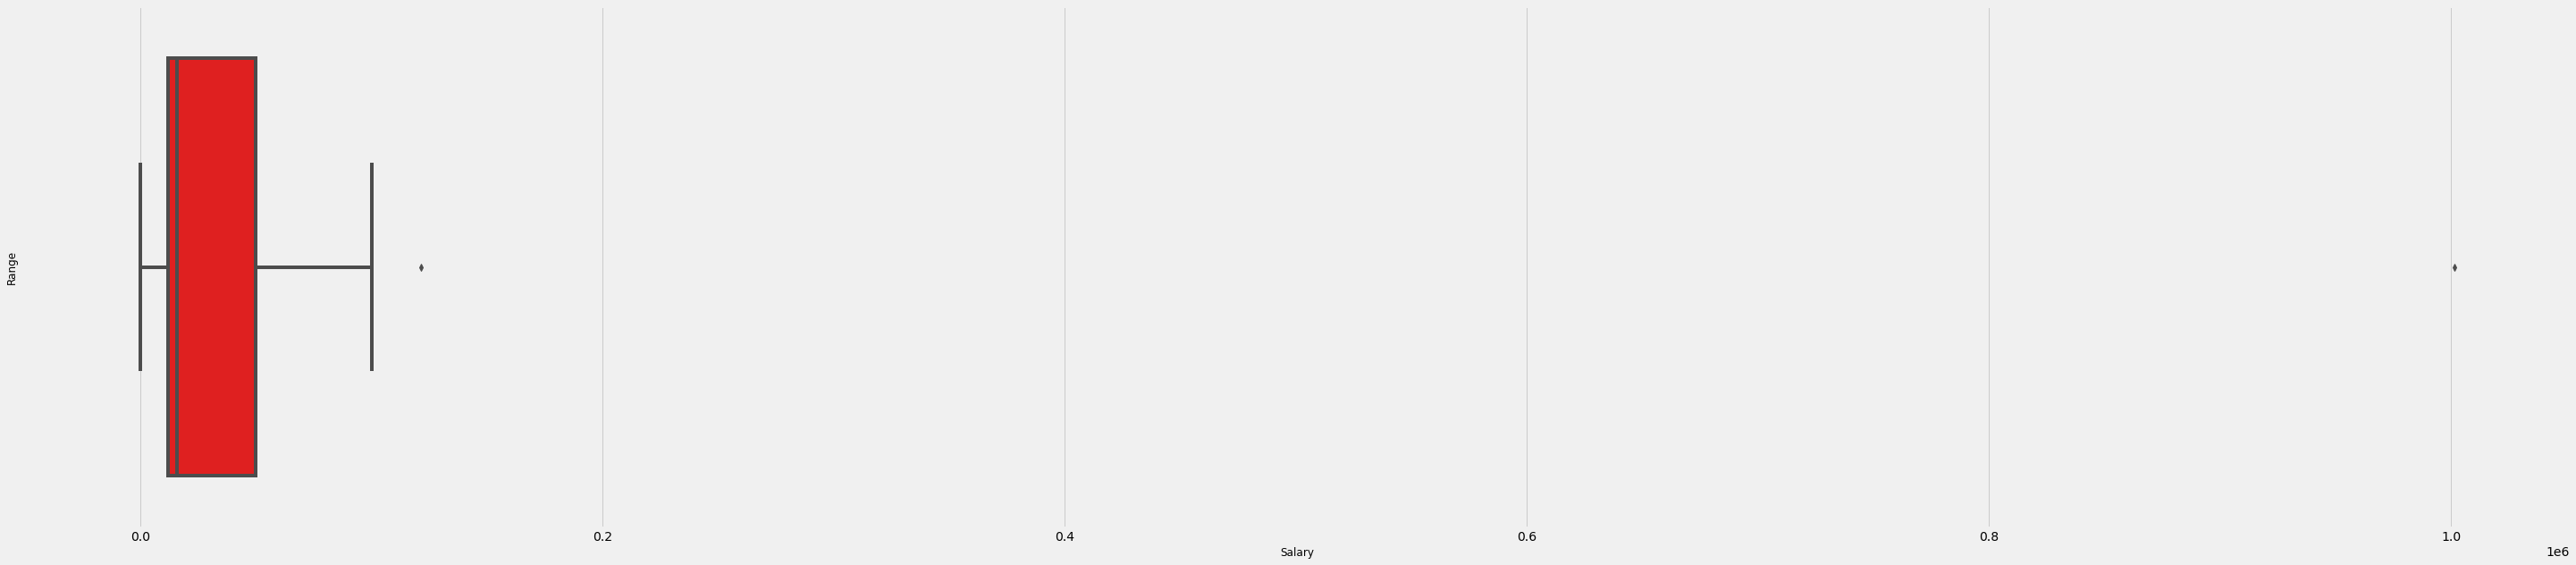

In [77]:
plt.rcParams['figure.figsize'] = (100, 10)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.boxplot(dfq2['Salary'], color = 'red')
plt.xlabel('Salary', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.show()

In [78]:
"if there are any missing values we will fill them with mean for 'Employees' for now"

"if there are any missing values we will fill them with mean for 'Employees' for now"

In [79]:

def outlier(dfq2):  #required function
  for column in dfq2:
      if (dfq2[column].nunique()>10 and (isinstance(dfq2[column][0], str)==False)):  #let us keep a very high threshold above which column will be assumed continous(here, we take a small threshold since very small amount of data)
                   i=0
                   for y in dfq2[column]:
                        mean = np.mean(dfq2[column])
                        std =np.std(dfq2[column])
                        if(((y-mean)/std)>3 or ((y-mean)/std)<-3) or y<=0:    #we find z_score=y-mean/std and if z_Score>3 or z_score<-3 we change the value.We also change value when values are negative in this data since salary cant be negative
                          if(dfq2['Designation'][i]=="CEO" and column=="Salary"):  #in case of CEO it should not be an outlier since CEO has very high salary usually
                            i+=1
                            continue
                          dfq2[column][i]=mean    #replacing value with mean of that column(can be something else in a proper dataset)
                        i+=1                    #i is tracking the row which we are in



In [80]:
outlier(dfq2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [81]:
dfq2.head(100)

,Designation,Salary
0,Employee,10000
1,Employee,12000
2,Employee,15000
3,CEO,100000
4,Employee,9000
5,Employee,11500
6,Employee,23000
7,Employee,20000
8,Employee,13000
9,Employee,16000


In [ ]:
#All outliers except Salary of CEO are taken care of!
##########End of Question 2#####
#Question 3 at top